In [1]:
import stormpy 
from mce_irl_pomdps import parser_pomdp
from mce_irl_pomdps import irl_pomdp_solver as irl_solver
import numpy as np

In [2]:
def correct_policy(pol):
    """ Stupid Remove numerical issues from a synthesized policy (close to zero negative values)
    """
    res_pol = dict()
    for o, actDict in pol.items():
        res_pol[o] = dict()
        neg_val = dict()
        sum_val = 0
        for a, val in actDict.items():
            if val < 0:
                res_pol[o][a] = 0
            else:
                res_pol[o][a] = val
            sum_val += res_pol[o][a]
        diff_val = 1 - sum_val
        for a, val in actDict.items():
            if val > 0:
                res_pol[o][a] += diff_val
                diff_val = 0
    return res_pol

In [3]:
# stormpy.pomdp.PomdpMemoryPattern.selective_counter
# stormpy.pomdp.PomdpMemoryPattern.fixed_counter
# stormpy.pomdp.PomdpMemoryPattern.selective_ring
# stormpy.pomdp.PomdpMemoryPattern.fixed_ring
# stormpy.pomdp.PomdpMemoryPattern.full
# stormpy.pomdp.PomdpMemoryPattern.trivial
np.random.seed(201)
pomdp_r_1 = parser_pomdp.PrismModel("rocksample_4_4_2.prism", 
                                    counter_type=stormpy.pomdp.PomdpMemoryPattern.fixed_counter, 
                                    memory_len=1, export=True)
pomdp_r_4 = parser_pomdp.PrismModel("rocksample_4_4_2.prism", 
                                    counter_type=stormpy.pomdp.PomdpMemoryPattern.fixed_counter, 
                                    memory_len=5, export=True)
pomdp_r_6 = parser_pomdp.PrismModel("rocksample_4_4_2.prism", 
                                    counter_type=stormpy.pomdp.PomdpMemoryPattern.fixed_counter, 
                                    memory_len=10, export=True)

In [4]:
print(pomdp_r_6.pomdp)

-------------------------------------------------------------- 
Model type: 	POMDP (sparse)
States: 	2609
Transitions: 	21946
Choices: 	13797
Observations: 	330
Reward Models:  total_time, finish_grock, sense_time
State Labels: 	14 labels
   * memstate_6 -> 368 item(s)
   * r2done -> 529 item(s)
   * memstate_3 -> 250 item(s)
   * memstate_0 -> 1 item(s)
   * memstate_4 -> 314 item(s)
   * memstate_9 -> 370 item(s)
   * memstate_7 -> 370 item(s)
   * init -> 1 item(s)
   * notr1done -> 2105 item(s)
   * memstate_5 -> 360 item(s)
   * deadlock -> 0 item(s)
   * memstate_8 -> 370 item(s)
   * memstate_1 -> 48 item(s)
   * memstate_2 -> 158 item(s)
Choice Labels: 	none
-------------------------------------------------------------- 



In [5]:
# Options for the solver
options_opt = irl_solver.OptOptions(mu=1e1, mu_spec=1e4, maxiter=200, maxiter_weight=50,
                      graph_epsilon=1e-6, discount=0.999, verbose=True, verbose_solver=False)
# True reward in the POMDP environment
weight = {'total_time' : 1, 'finish_grock' : 50, 'sense_time' : 2}

In [6]:
# Build the instance without side information
pomdp_r_1._has_sideinfo = False # Ignore the side information for the first part
irlPb_1 = irl_solver.IRLSolver(pomdp_r_1, init_trust_region=1.1, max_trust_region=1.5, options=options_opt)
pol_val_grb_1mem = irlPb_1.from_reward_to_policy_via_scp(weight)

Academic license - for non-commercial use only - expires 2021-07-11
Using license file /home/fdjeumou/gurobi.lic
Initialize Linear subproblem to be solved at iteration k
[Time used to build the full Model : 0.10564756393432617]
[Initialization] Reward attained -33.03511291032705, Spec SAT : 0
[Initialization] Number of steps : 0
[Iter 0]: Reward attained -19.731654035632186, Spec SAT : 0, Trust region : 1.125
[Iter 0]: Update time : 0.02001190185546875s, Checking time : 0.012379646301269531s, Solve time: 0.7421088218688965s
[Iter 1]: Reward attained -8.518026084545475, Spec SAT : 0, Trust region : 1.15625
[Iter 1]: Update time : 0.03790903091430664s, Checking time : 0.025870084762573242s, Solve time: 0.8304083347320557s
[Iter 2]: Reward attained 0.32042089218716063, Spec SAT : 0, Trust region : 1.1953125
[Iter 2]: Update time : 0.056690216064453125s, Checking time : 0.0364527702331543s, Solve time: 1.0722100734710693s
[Iter 3]: Reward attained 6.9865197144424105, Spec SAT : 0, Trust re

In [7]:
pomdp_r_4._has_sideinfo = False # Ignore the side information for the first part
irlPb_4 = irl_solver.IRLSolver(pomdp_r_4, init_trust_region=1.1, max_trust_region=1.5, options=options_opt)
pol_val_grb_4mem = irlPb_4.from_reward_to_policy_via_scp(weight)

Initialize Linear subproblem to be solved at iteration k
[Time used to build the full Model : 0.18607687950134277]
[Initialization] Reward attained -33.03511291032673, Spec SAT : 0
[Initialization] Number of steps : 0
[Iter 0]: Reward attained -19.777709392479032, Spec SAT : 0, Trust region : 1.125
[Iter 0]: Update time : 0.04312920570373535s, Checking time : 0.04152703285217285s, Solve time: 2.005781650543213s
[Iter 1]: Reward attained -8.605268032629313, Spec SAT : 0, Trust region : 1.15625
[Iter 1]: Update time : 0.11213302612304688s, Checking time : 0.06730175018310547s, Solve time: 2.564131259918213s
[Iter 2]: Reward attained 0.2566881480312314, Spec SAT : 0, Trust region : 1.1953125
[Iter 2]: Update time : 0.1507735252380371s, Checking time : 0.09832334518432617s, Solve time: 3.3317973613739014s
[Iter 3]: Reward attained 6.948525706083277, Spec SAT : 0, Trust region : 1.244140625
[Iter 3]: Update time : 0.2300105094909668s, Checking time : 0.12354230880737305s, Solve time: 4.4940

In [8]:
pomdp_r_6._has_sideinfo = False # Ignore the side information for the first part
irlPb_6 = irl_solver.IRLSolver(pomdp_r_6, init_trust_region=1.1, max_trust_region=1.5, options=options_opt)
pol_val_grb_6mem = irlPb_6.from_reward_to_policy_via_scp(weight)

Initialize Linear subproblem to be solved at iteration k
[Time used to build the full Model : 0.6048946380615234]
[Initialization] Reward attained -33.03511291032717, Spec SAT : 0
[Initialization] Number of steps : 0
[Iter 0]: Reward attained -20.270650832995862, Spec SAT : 0, Trust region : 1.125
[Iter 0]: Update time : 0.14075613021850586s, Checking time : 0.09503531455993652s, Solve time: 6.815441131591797s
[Iter 1]: Reward attained -9.331641534649542, Spec SAT : 0, Trust region : 1.15625
[Iter 1]: Update time : 0.3409385681152344s, Checking time : 0.19128799438476562s, Solve time: 25.15332841873169s
[Iter 2]: Reward attained -0.46856092681026784, Spec SAT : 0, Trust region : 1.1953125
[Iter 2]: Update time : 0.47231292724609375s, Checking time : 0.29907846450805664s, Solve time: 46.82692742347717s
[Iter 3]: Reward attained 6.397615700774705, Spec SAT : 0, Trust region : 1.244140625
[Iter 3]: Update time : 0.603365421295166s, Checking time : 0.3753697872161865s, Solve time: 65.66693

In [9]:
pol_val_mdp = irlPb_1.from_reward_to_optimal_policy_mdp_lp(weight, gamma=options_opt.discount)

Initialize Linear subproblem to be solved at iteration k
[Time used to build the full Model : 0.022665977478027344]
[Total solving time : 0.00989842414855957]
[Optimal expected reward : 43.664725846971564]


In [10]:
# Generate a bunch of trajectories
np.random.seed(101)
nb_run = 2000
max_iter_per_run = 300
_, rewDataMdp = pomdp_r_1.simulate_policy(pol_val_mdp, weight, nb_run, max_iter_per_run, 
                        obs_based=False, stop_at_accepting_state=False)
_, rewDataPomdp_1mem = pomdp_r_1.simulate_policy(pol_val_grb_1mem, weight, nb_run, max_iter_per_run, 
                        obs_based=True, stop_at_accepting_state=False)
_, rewDataPomdp_4mem = pomdp_r_4.simulate_policy(pol_val_grb_4mem, weight, nb_run, max_iter_per_run, 
                        obs_based=True, stop_at_accepting_state=False)
_, rewDataPomdp_10mem = pomdp_r_6.simulate_policy(pol_val_grb_6mem, weight, nb_run, max_iter_per_run, 
                        obs_based=True, stop_at_accepting_state=False)

In [11]:
# discountArray = np.array([options_opt.discount**i for i in range(max_iter_per_run)])
discountArray = np.array([1 for i in range(max_iter_per_run)])

In [12]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

def plot_pol(rewData, cData=-1, color='red', label='dum', alpha=0.5, plot_std=False, linestyle='solid'):
    rewData = np.array(rewData) * discountArray
    arr_rewData = np.cumsum(rewData, axis=1)
    mean_rew = np.mean(arr_rewData, axis = 0)
    min_rew = np.min(arr_rewData, axis=0)
    max_rew = np.max(arr_rewData, axis=0)
    std_rew = np.std(arr_rewData, axis=0)
    axis_x = np.array([i for i in range(mean_rew.shape[0])])
#     print(mean_rew.shape, cData)
    plt.plot(axis_x[:cData], mean_rew[:cData], color=color, label=label, linestyle=linestyle)
    if plot_std:
        plt.fill_between(axis_x[:cData], np.maximum(min_rew,mean_rew-std_rew)[:cData], np.minimum(max_rew,mean_rew+std_rew)[:cData], color=color, alpha=alpha)

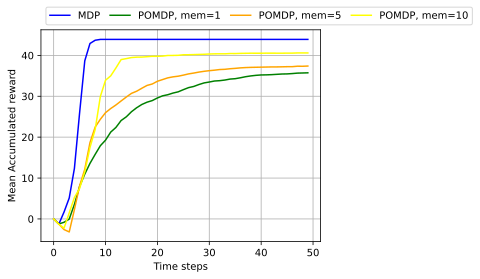

In [13]:
nData = 50
std_activate = False
plt.figure()
plot_pol(rewDataMdp, nData, color='blue', label='MDP', alpha=1, plot_std=std_activate)
plot_pol(rewDataPomdp_1mem, nData, color='green', label='POMDP, mem=1', alpha=0.8, plot_std=std_activate)
# plot_pol(pol_val_scp, color='red', nb_run=nb_run, nb_iter_run=max_iter_per_run, is_obs=True)
plot_pol(rewDataPomdp_4mem, nData, color='orange', label='POMDP, mem=5', alpha = 0.6, plot_std=std_activate)
plot_pol(rewDataPomdp_10mem, nData, color='yellow', label='POMDP, mem=10', alpha=0.6, plot_std=std_activate)
# plot_pol(rewDataSideInfoLp, color='cyan', label='Learned policy with side information,0.7', alpha=0.2)
plt.ylabel('Mean Accumulated reward')
plt.xlabel('Time steps')
plt.grid(True)
plt.legend(ncol=4, bbox_to_anchor=(0,1), loc='lower left', columnspacing=1.0)
plt.tight_layout()
plt.show()

In [ ]:
import stormpy
import stormpy.simulator
import re

def parse_state_repr(state_repr):
    return state_repr

def gen_traj(sigma, pomdp, max_run, max_iter_per_run, obs_based=True):
    rand_seed = np.random.randint(0, 10000)
    simulator = stormpy.simulator.create_simulator(pomdp.pomdp, seed=rand_seed)
    res_traj = list()
    for i in range(max_run):
        # Initialize the simulator
        obs, reward = simulator.restart()
        current_state = simulator._report_state()
        # Save the sequence of states
        seq_obs = []
        for j in range(max_iter_per_run):
            # Get the list of available actions
            actList = [a for a in simulator.available_actions()]
            # Add the observaion, action to the sequence
            if obs_based:
                # Pick an action in the set of random actions with probability given by the policy
                act = np.random.choice(np.array([a for a in sigma[obs]]),p=np.array([probA for a, probA in sigma[obs].items()]))
            else:
                # Pick an action in the set of random actions with probability given by the
                act = np.random.choice(np.array([a for a in sigma[current_state]]), p=np.array([probA for a, probA in sigma[current_state].items()]))
            # Update the state of the simulator
            obs, reward = simulator.step(actList[act])
            current_state = simulator._report_state()
            seq_obs.append(parse_state_repr(pomdp.string_repr_state(current_state)))
            # Check if reaching a looping state
            if simulator.is_done():
                break
        res_traj.append(seq_obs)
    return res_traj

In [ ]:
res = gen_traj(pol_val_mdp, pomdp_r, 5, 50, obs_based=False)

In [ ]:
for elem in res[4]:
    print(elem)

In [ ]:
import stormpy
print(dir(stormpy.pomdp.PomdpMemoryPattern))